In [1]:
import numpy as np 
import time
import matplotlib.pyplot as plt

In [2]:
from moara_for_qiskit import MoaraBackend
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, BasicAer
from qiskit.visualization import plot_histogram
from qiskit.providers.models import QasmBackendConfiguration
from qiskit.providers import BaseBackend
from qiskit.providers.aer import QasmSimulator

In [3]:
max_depth = 20
shot_count = 1

def getQiskitSimulator():
    #return BasicAer.get_backend('qasm_simulator')
    #return Aer.get_backend('qasm_simulator')
    return QasmSimulator(max_parallel_threads=1, precision="single")

def entangler(circuit,n):
    for i in range(n-1):
        circuit.crx(3,i,i+1)

def entanglerReverse(circuit,n):
    for i in range(n):
        target = n-i-1
        if i != target:
            circuit.crx(np.pi/7,i,target)

def entanglerCX(circuit,n):
    for i in range(n-1):
        circuit.cx(i,i+1)

def entanglerReverseCX(circuit,n):
    for i in range(n):
        target = n-i-1
        if i != target:
            circuit.cx(i,target)

def Rx(citrcuit,n):
    for i in range(n):
        citrcuit.rx(np.pi/3,i)

def Ry(citrcuit,n):
    for i in range(n):
        citrcuit.ry(np.pi/5,i)

def XY(citrcuit,n):
    for i in range(n):
        citrcuit.x(i)
        citrcuit.y(i)

In [4]:
def test(i,j):
    qc=QuantumCircuit(i,i)
    for k in range(j):
        Rx(qc,i)
        entangler(qc,i)
        Ry(qc,i)
        entanglerReverse(qc,i)
    qc.measure(range(i), range(i))
    return qc

In [5]:
def bench(simulator, max_depth, exec_func):
    i=2
    j=2
    depth=[]
    for i in range(2,max_depth):
        duration=0
        while (duration<0.50) and j<101:
            test_qc=test(i,j)
            start_time = time.time()
            a = exec_func(simulator, test_qc)
            a.get('0'*i,0)
            duration=(time.time() - start_time)
            j=j+1
        depth.append(j-1)
        j=2
    return depth

def scor(depth):
    sc=0
    i=2
    for x in depth:
        sc=sc+depth*i
        i=i+1
    return sc

In [6]:
i=3
j=3
qc=test(i,j)
qc.draw()

┌─────────┐         ┌─────────┐                                 »
q_0: ┤ RX(π/3) ├────■────┤ RY(π/5) ├────────────────■────────────────»
     ├─────────┤┌───┴───┐└─────────┘┌─────────┐     │     ┌─────────┐»
q_1: ┤ RX(π/3) ├┤ RX(3) ├─────■─────┤ RY(π/5) ├─────┼─────┤ RX(π/3) ├»
     ├─────────┤└───────┘ ┌───┴───┐ ├─────────┤┌────┴────┐└─────────┘»
q_2: ┤ RX(π/3) ├──────────┤ RX(3) ├─┤ RY(π/5) ├┤ RX(π/7) ├───────────»
     └─────────┘          └───────┘ └─────────┘└─────────┘           »
c: 3/════════════════════════════════════════════════════════════════»
                                                                     »
«     ┌─────────┐┌─────────┐         ┌─────────┐                      »
«q_0: ┤ RX(π/7) ├┤ RX(π/3) ├────■────┤ RY(π/5) ├────────────────■─────»
«     └────┬────┘└─────────┘┌───┴───┐└─────────┘┌─────────┐     │     »
«q_1: ─────┼────────────────┤ RX(3) ├─────■─────┤ RY(π/5) ├─────┼─────»
«          │     ┌─────────┐└───────┘ ┌───┴───┐ ├─────────┤┌────┴────┐»
«q_2: ─────■─────┤ RX(π/3) ├──────────┤ RX(3) ├─┤ RY(π/5) ├┤ RX(π/7) ├»
«                └─────────┘          └───────┘ └─────────┘└─────────┘»
«c: 3/════════════════════════════════════════════════════════════════»
«                                                                     »
«                ┌─────────┐┌─────────┐         ┌─────────┐           »
«q_0: ───────────┤ RX(π/7) ├┤ RX(π/3) ├────■────┤ RY(π/5) ├───────────»
«     ┌─────────┐└────┬────┘└─────────┘┌───┴───┐└─────────┘┌─────────┐»
«q_1: ┤ RX(π/3) ├─────┼────────────────┤ RX(3) ├─────■─────┤ RY(π/5) ├»
«     └─────────┘     │     ┌─────────┐└───────┘ ┌───┴───┐ ├─────────┤»
«q_2: ────────────────■─────┤ RX(π/3) ├──────────┤ RX(3) ├─┤ RY(π/5) ├»
«                           └─────────┘          └───────┘ └─────────┘»
«c: 3/════════════════════════════════════════════════════════════════»
«                                                                     »
«                   ┌─────────┐┌─┐   
«q_0: ─────■────────┤ RX(π/7) ├┤M├───
«          │     ┌─┐└────┬────┘└╥┘   
«q_1: ─────┼─────┤M├─────┼──────╫────
«     ┌────┴────┐└╥┘     │      ║ ┌─┐
«q_2: ┤ RX(π/7) ├─╫──────■──────╫─┤M├
«     └─────────┘ ║             ║ └╥┘
«c: 3/════════════╩═════════════╩══╩═
«                 1             0  2

In [7]:
simulator = getQiskitSimulator()
result = execute(qc, simulator, shots=1024)
print(result.result().get_counts())

simulator2 = MoaraBackend(True)
result2 = execute(qc, simulator2, shots=1024)
print(result2)

{'000': 117, '001': 60, '010': 124, '011': 121, '100': 241, '101': 68, '110': 84, '111': 209}
{'010': 138, '011': 119, '001': 69, '110': 74, '000': 116, '100': 242, '101': 52, '111': 214}


In [8]:
def exec_func(sim, circ):
    return execute(circ, sim, optimization_level=0, shots=shot_count).result().get_counts(circ)

simulator=getQiskitSimulator()
depth=bench(simulator,max_depth, exec_func)
print(depth)

[100, 100, 73, 64, 44, 44, 35, 32, 27, 25, 23, 19, 16, 15, 14, 13, 10, 8]


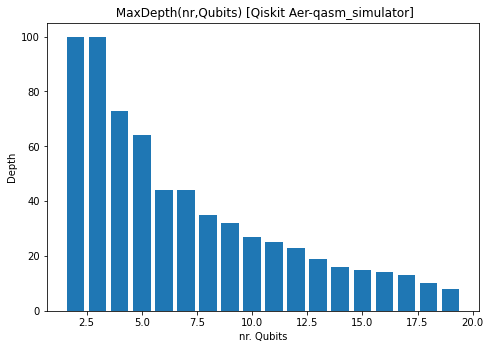

In [9]:
simulator_name='Qiskit Aer-qasm_simulator'

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(2,max_depth)]
ax.bar(langs,depth)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name+']')
ax.set_xlabel('nr. Qubits')
ax.set_ylabel('Depth')
plt.show()

In [10]:
def exec_func2(sim, circ):
    return execute(circ, sim, optimization_level=0, shots=shot_count)

simulator2 = MoaraBackend()
depth2=bench(simulator2, max_depth, exec_func2)
print(depth2)

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 95, 100, 84, 63, 33, 19, 11, 6]


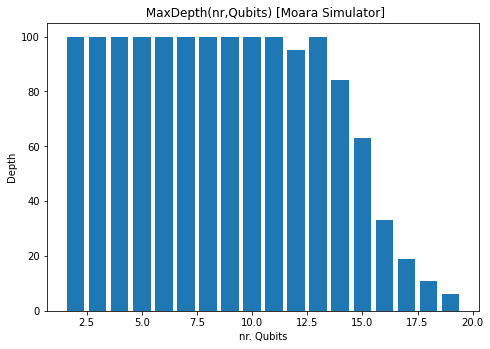

In [11]:
simulator_name2='Moara Simulator'
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(2,max_depth)]
ax.bar(langs,depth2)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name2+']')
ax.set_xlabel('nr. Qubits')
ax.set_ylabel('Depth')
plt.show()

In [12]:
i=20
j=80
circ=test(i,j)
sim = MoaraBackend(True)
start_time = time.time()
res = execute(circ, sim, optimization_level=0, shots=shot_count)
duration=(time.time() - start_time)
print(duration)
#plot_histogram(res)

17.729265928268433


In [13]:
i=20
j=80
circ=test(i,j)

sim = getQiskitSimulator()
start_time = time.time()
res = execute(circ, sim, optimization_level=0, shots=shot_count).result().get_counts(circ)
duration=(time.time() - start_time)
print(duration)
#plot_histogram(res)

8.327086210250854
